# Library Import

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This is a test

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Raw Data Reading and Cleaning

In [6]:
data = pd.read_csv("/content/drive/MyDrive/Global_warming/GlobalTemperatures.csv")
df = pd.DataFrame(data)
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,8/1/2015,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,9/1/2015,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,10/1/2015,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,11/1/2015,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [7]:
df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [8]:
df.dtypes

,0
dt,object
LandAverageTemperature,float64
LandAverageTemperatureUncertainty,float64
LandMaxTemperature,float64
LandMaxTemperatureUncertainty,float64
LandMinTemperature,float64
LandMinTemperatureUncertainty,float64
LandAndOceanAverageTemperature,float64
LandAndOceanAverageTemperatureUncertainty,float64


In [9]:
def standardize_date_format(date_str):
    # Check if the date is in MM/DD/YYYY format (if there's a '/' in the string)
    if '/' in date_str:
        try:
            # Convert from MM/DD/YYYY to YYYY-MM-DD
            return pd.to_datetime(date_str, format='%m/%d/%Y', errors='coerce')
        except ValueError:
            return np.nan
    else:
        # Convert from YYYY-MM-DD to datetime format
        try:
            return pd.to_datetime(date_str, format='%Y-%m-%d', errors='coerce')
        except ValueError:
            return np.nan

In [10]:
# Apply the function to the 'dt' column
df['dt'] = df['dt'].apply(standardize_date_format)

In [11]:
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         3192 non-null   datetime64[ns]
 1   LandAverageTemperature                     3180 non-null   float64       
 2   LandAverageTemperatureUncertainty          3180 non-null   float64       
 3   LandMaxTemperature                         1992 non-null   float64       
 4   LandMaxTemperatureUncertainty              1992 non-null   float64       
 5   LandMinTemperature                         1992 non-null   float64       
 6   LandMinTemperatureUncertainty              1992 non-null   float64       
 7   LandAndOceanAverageTemperature             1992 non-null   float64       
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64       
dtypes: datetime64[ns](1)

# Data with Removed Column Handling

In [35]:
df_removed_col = df.copy()

In [30]:
df_removed_col.drop(['LandMaxTemperature', 'LandMaxTemperatureUncertainty', 'LandMinTemperature', 'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty'], axis=1 ,inplace=True)
df_removed_col

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574
1,1750-02-01,3.083,3.702
2,1750-03-01,5.626,3.076
3,1750-04-01,8.490,2.451
4,1750-05-01,11.573,2.072
...,...,...,...
3187,2015-08-01,14.755,0.072
3188,2015-09-01,12.999,0.079
3189,2015-10-01,10.801,0.102
3190,2015-11-01,7.433,0.119


In [31]:
df_removed_col.isnull().sum()

,0
dt,0
LandAverageTemperature,12
LandAverageTemperatureUncertainty,12


In [32]:
df_removed_col.dropna(inplace=True)

In [33]:
df_removed_col.drop_duplicates(inplace=True)

# Data with Removed NaN Handling

In [34]:
df_removed_na = df.copy()

In [19]:
df_removed_na = df_removed_na.dropna()

In [20]:
df_removed_na.reset_index(drop=True, inplace=True)

In [21]:
df_removed_na

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
2,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
3,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
4,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249
...,...,...,...,...,...,...,...,...,...
1987,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
1988,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
1989,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
1990,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


# Visualization for DataFrame with removed Columns

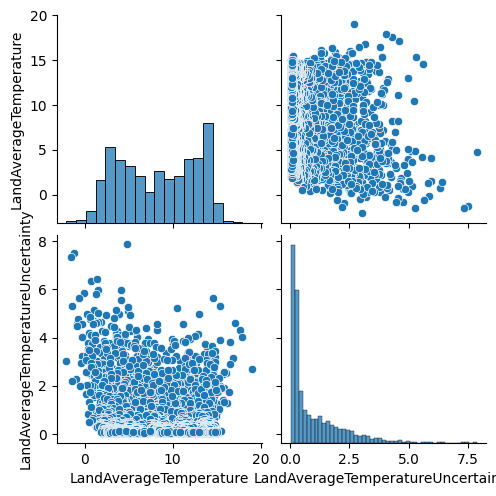

In [22]:
sns.pairplot(df_removed_col)
plt.show()

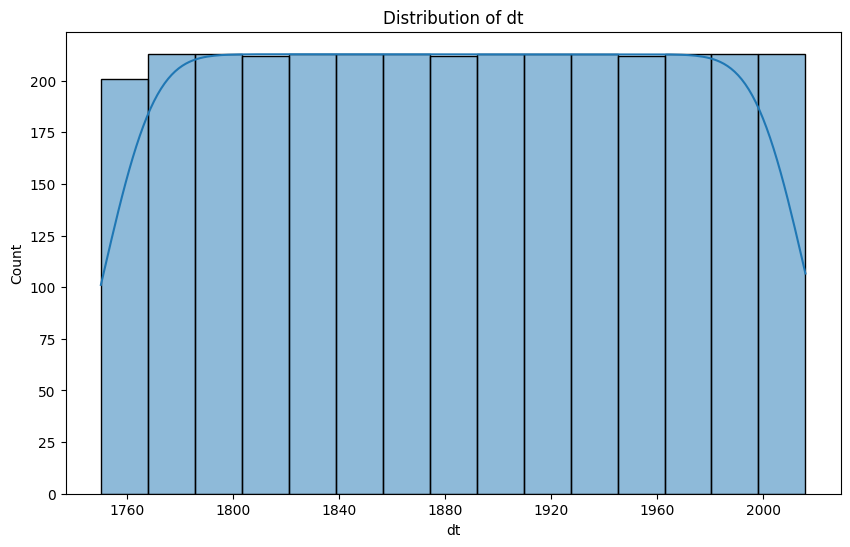

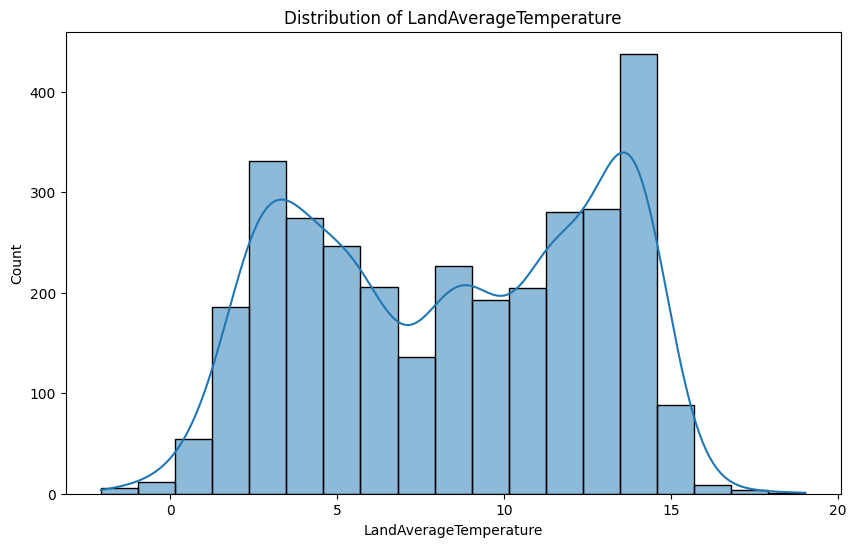

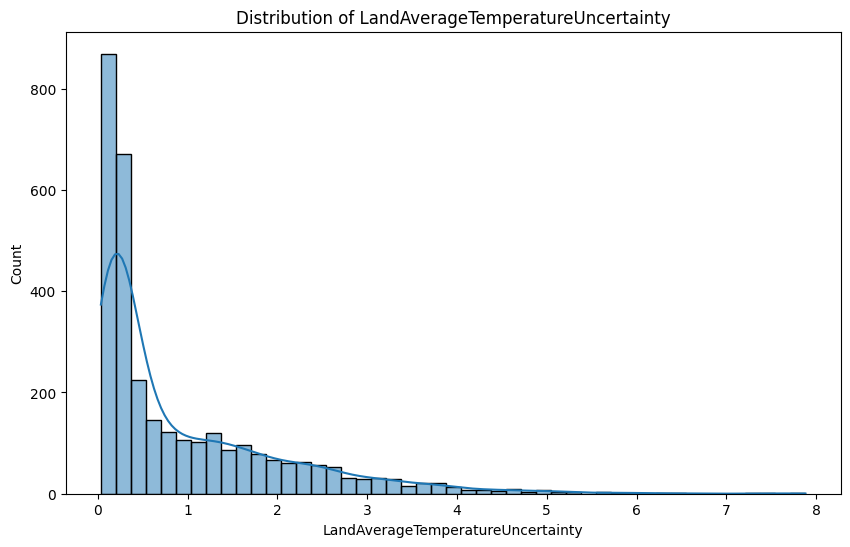

In [23]:
numeric_columns = df_removed_col.columns
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_removed_col[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

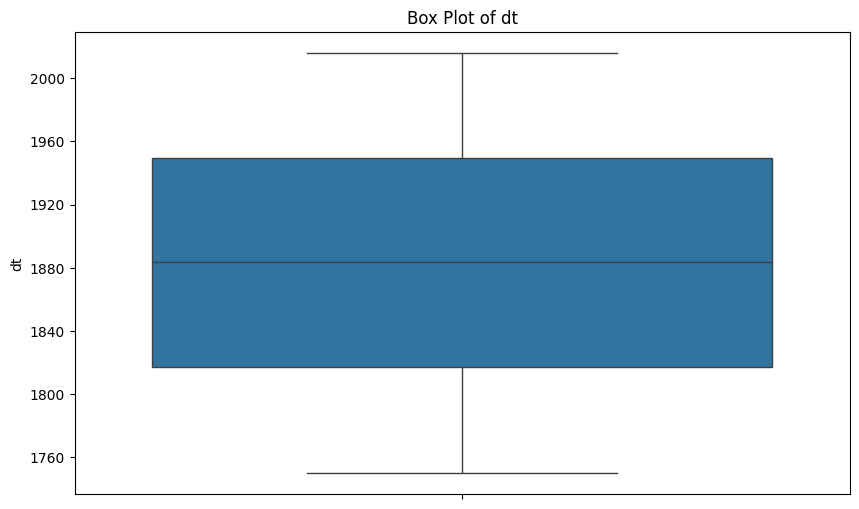

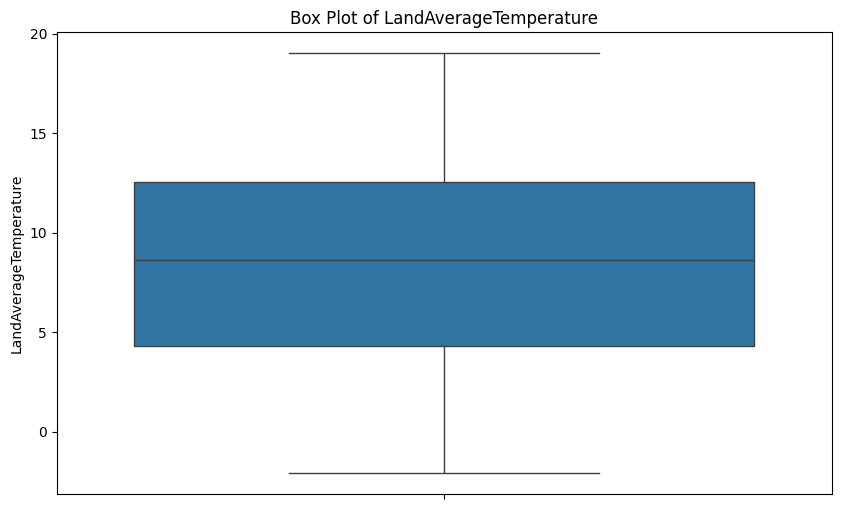

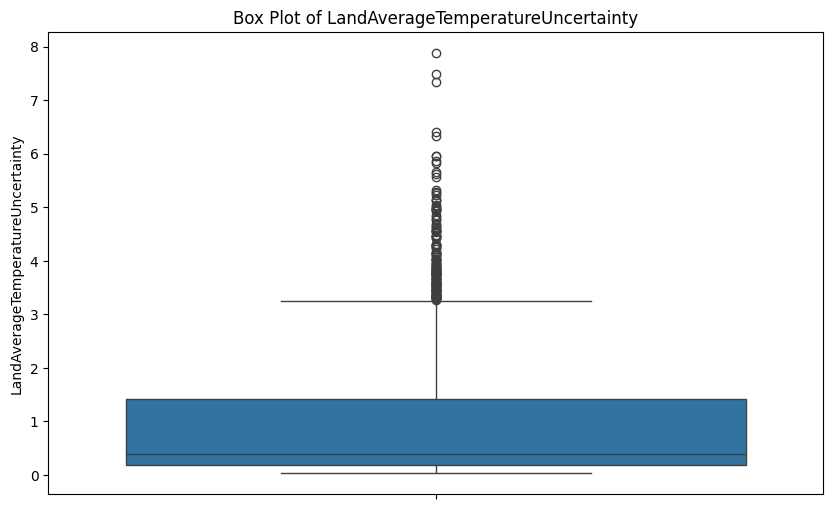

In [24]:
numeric_columns = df_removed_col.columns
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df_removed_col[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

# Visualization for DataFrame with removed NaNs

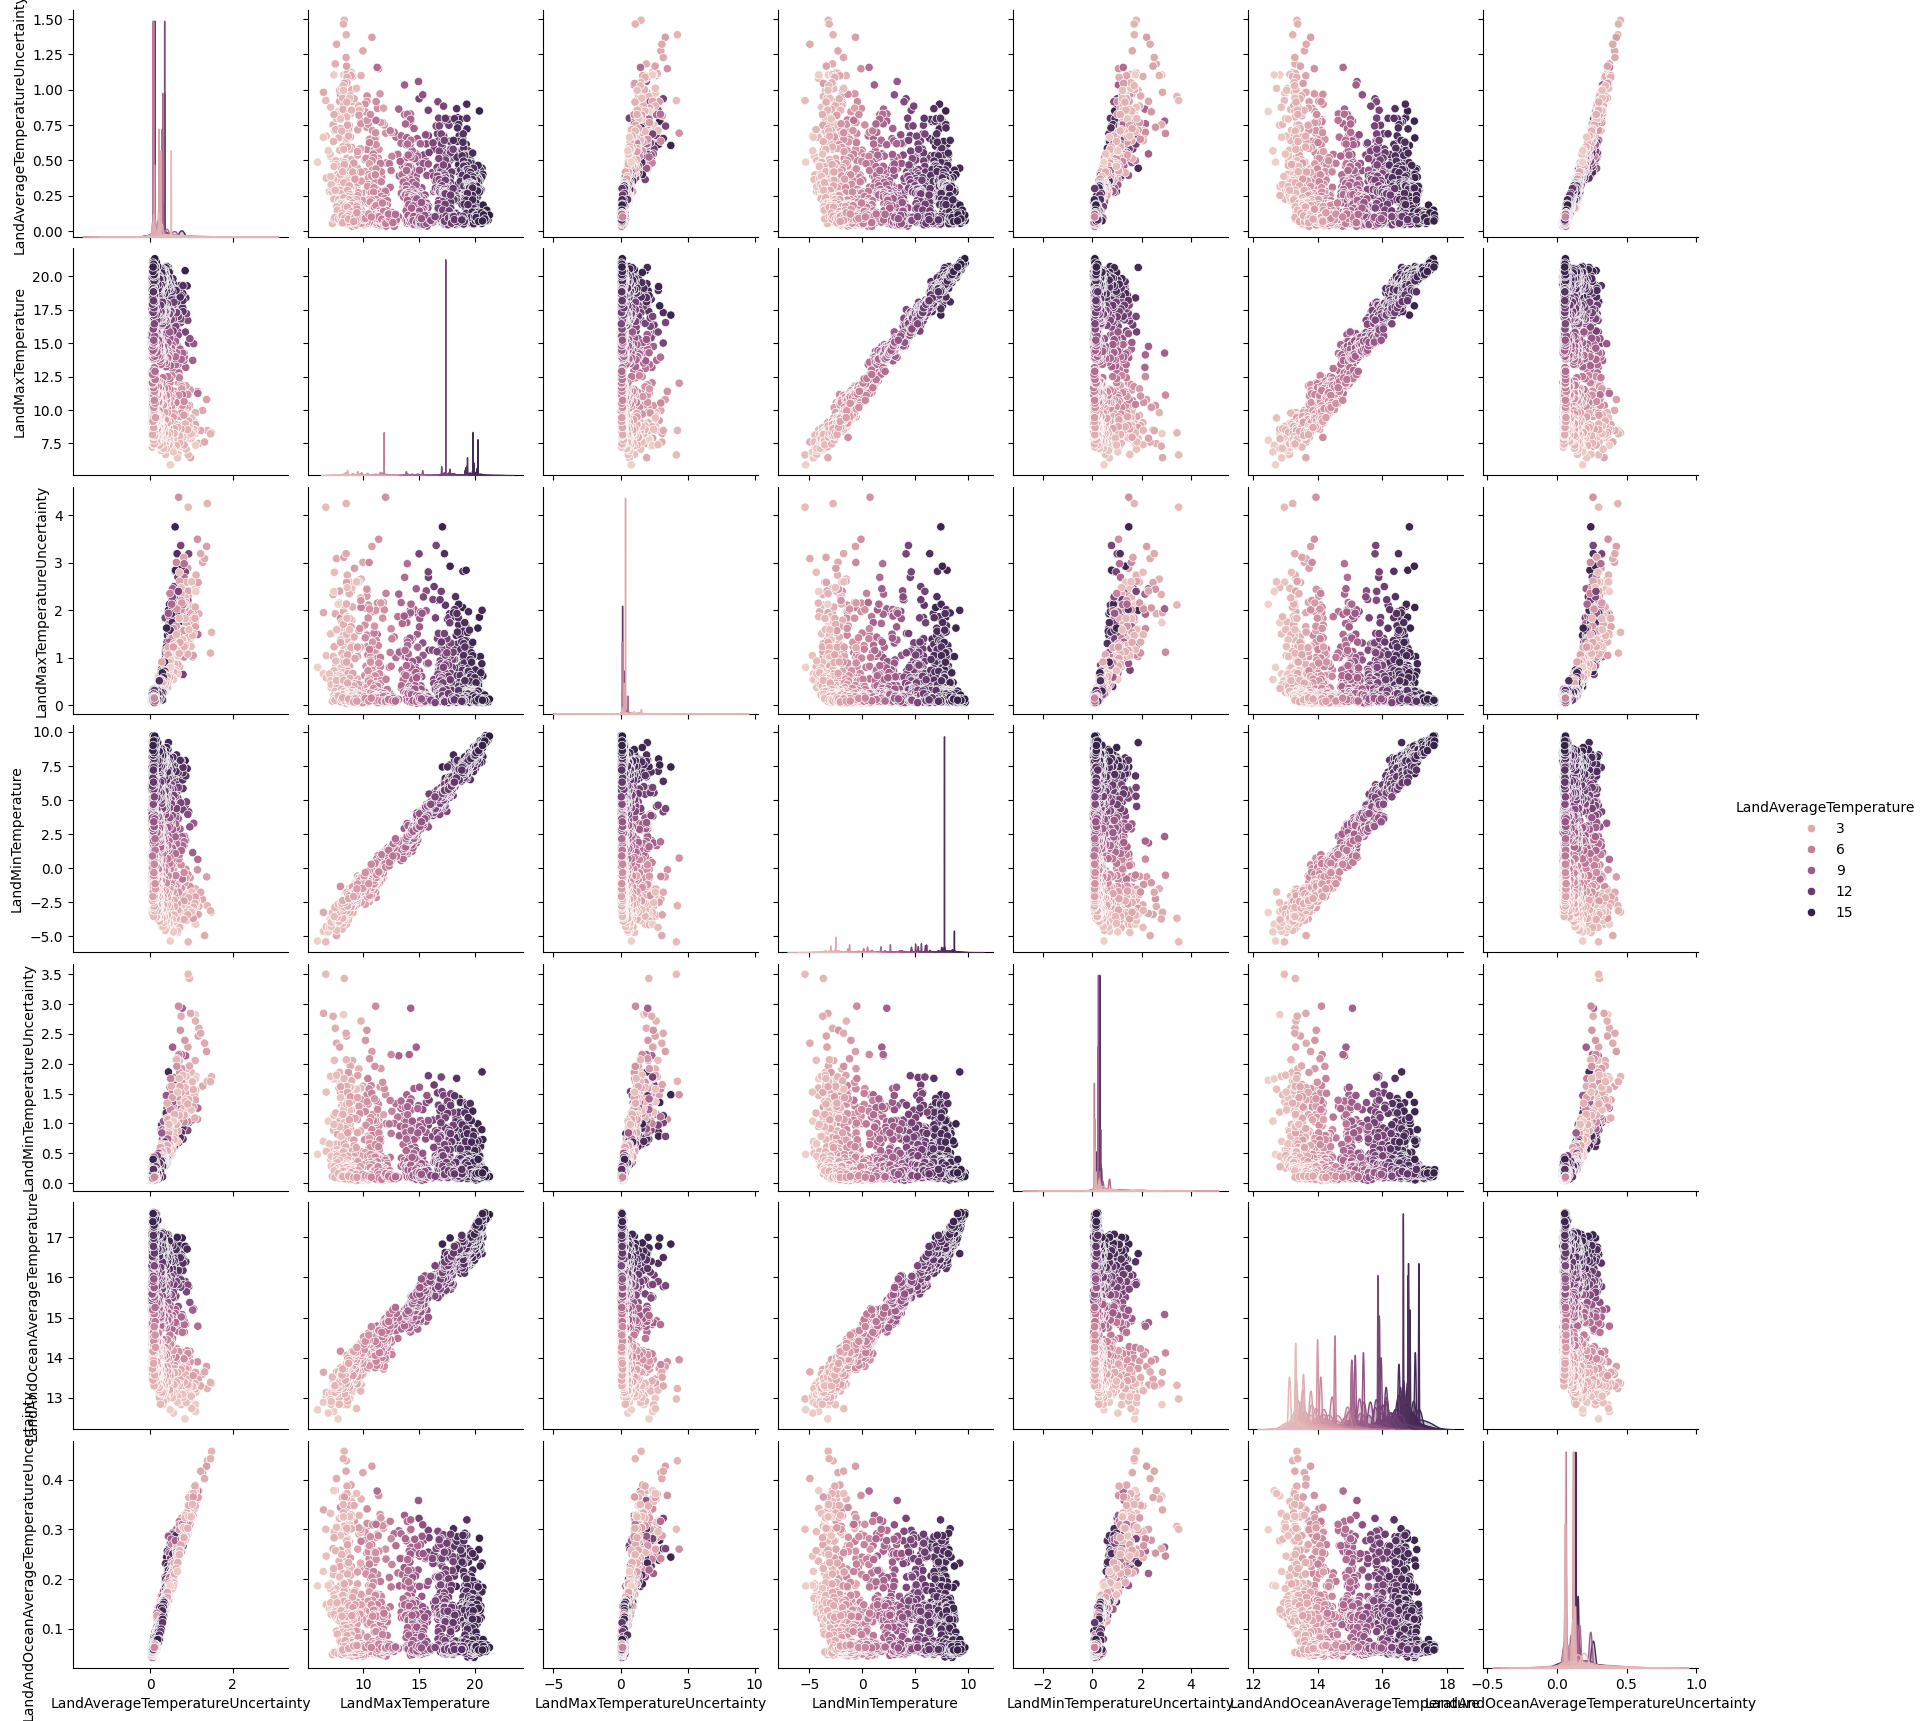

In [25]:
sns.pairplot(df_removed_na, hue='LandAverageTemperature')
plt.show()

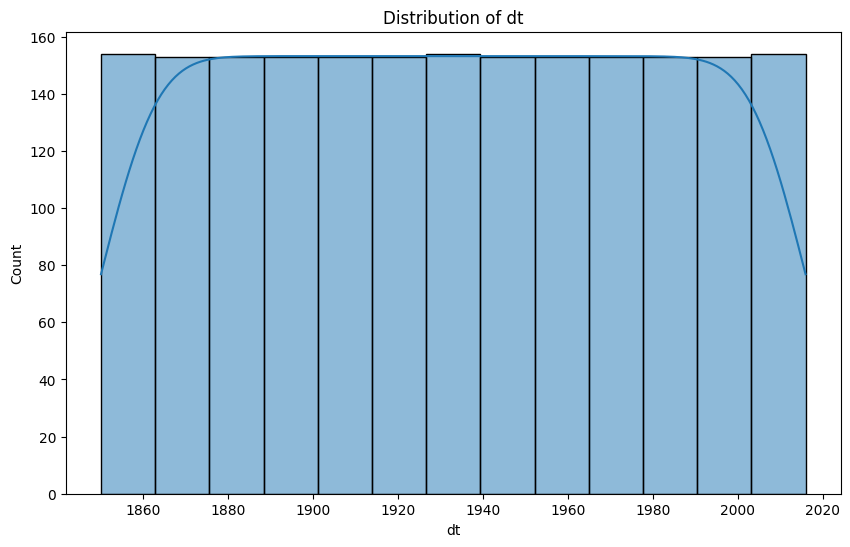

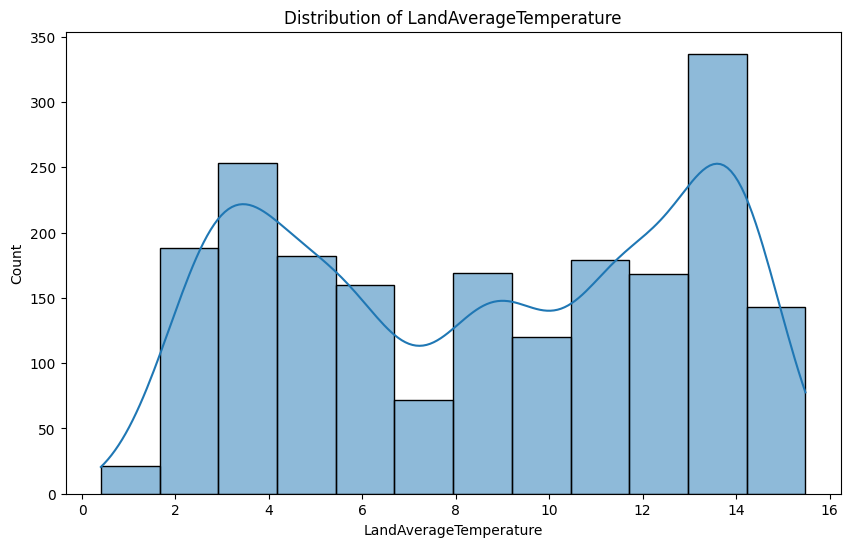

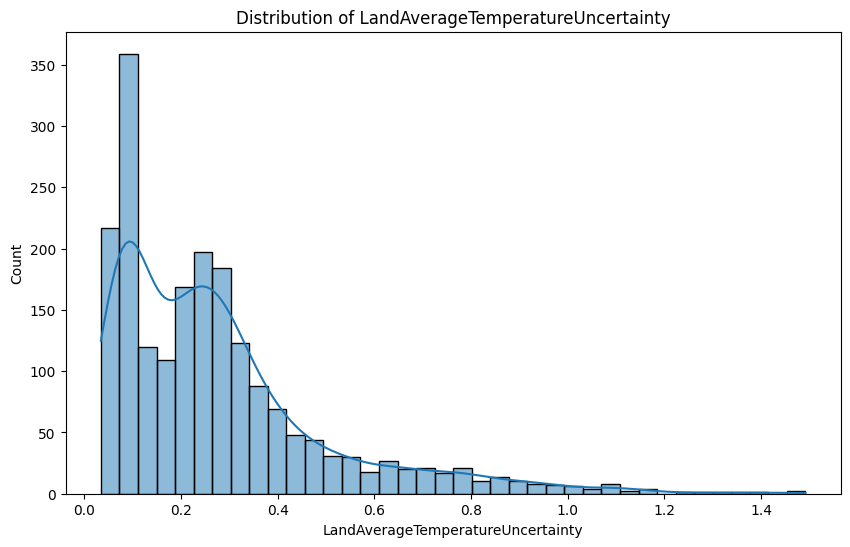

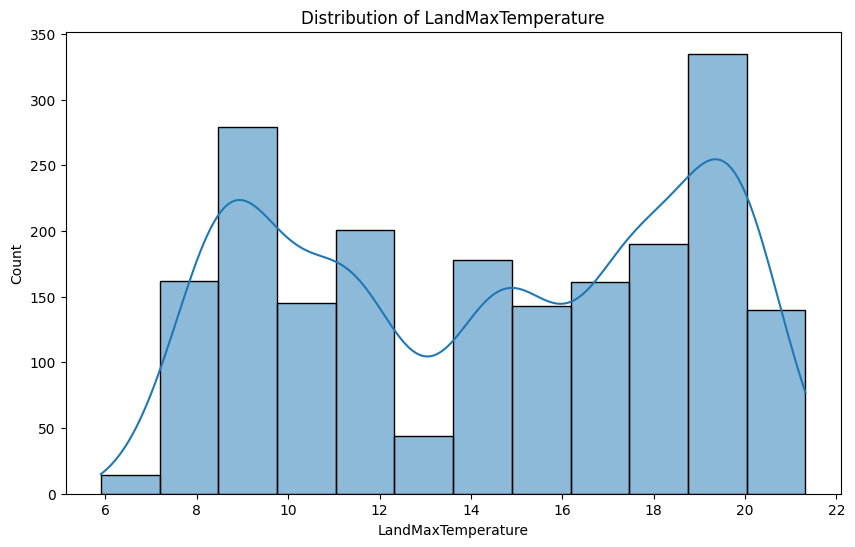

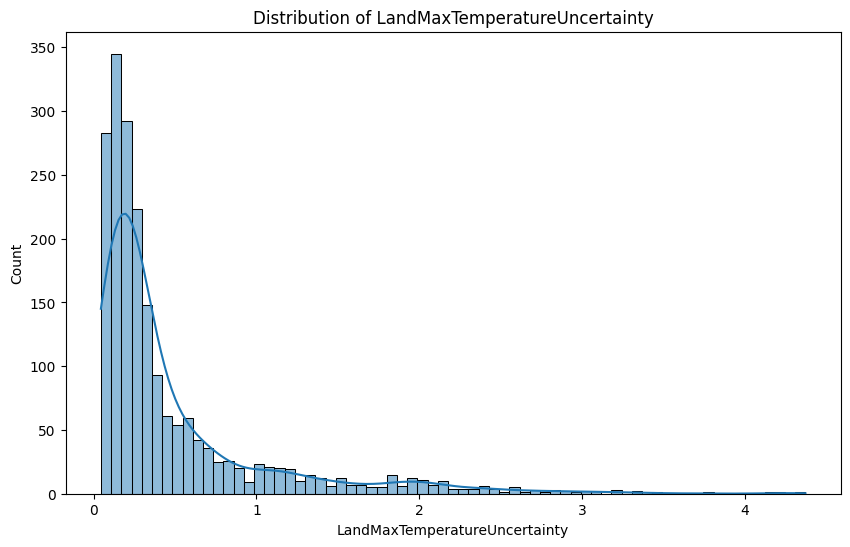

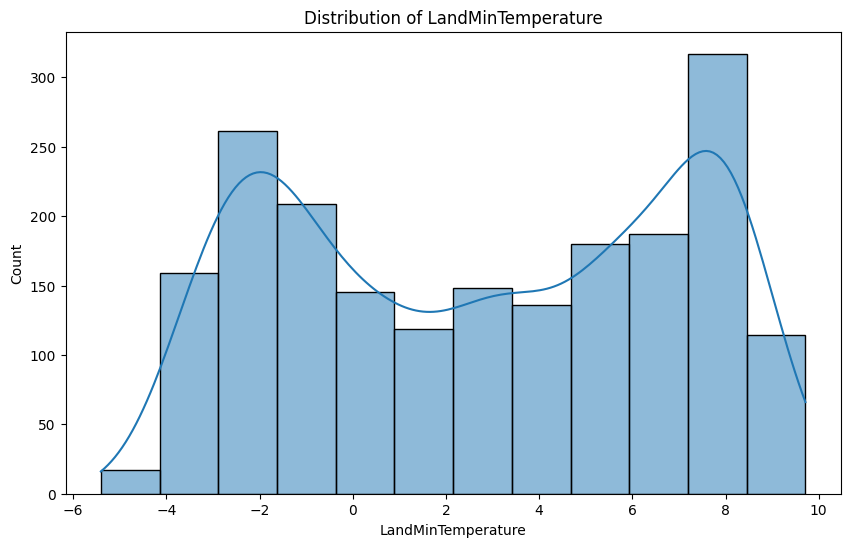

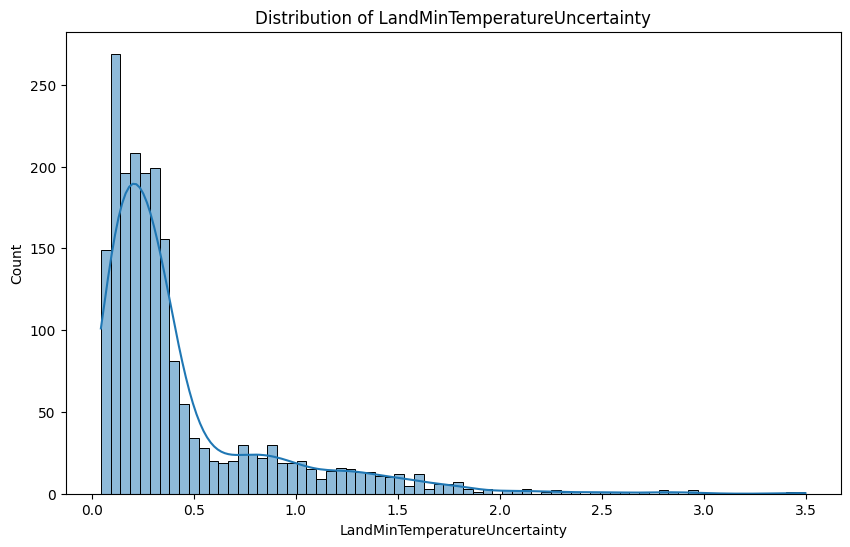

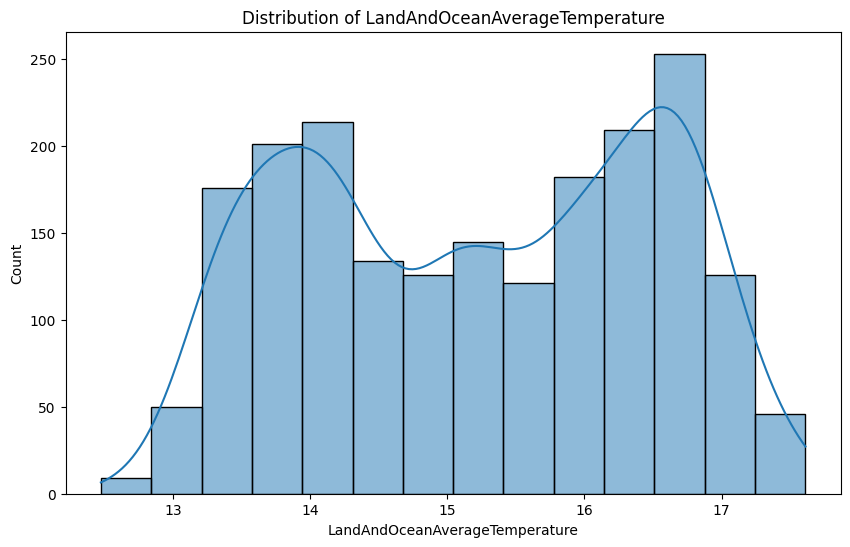

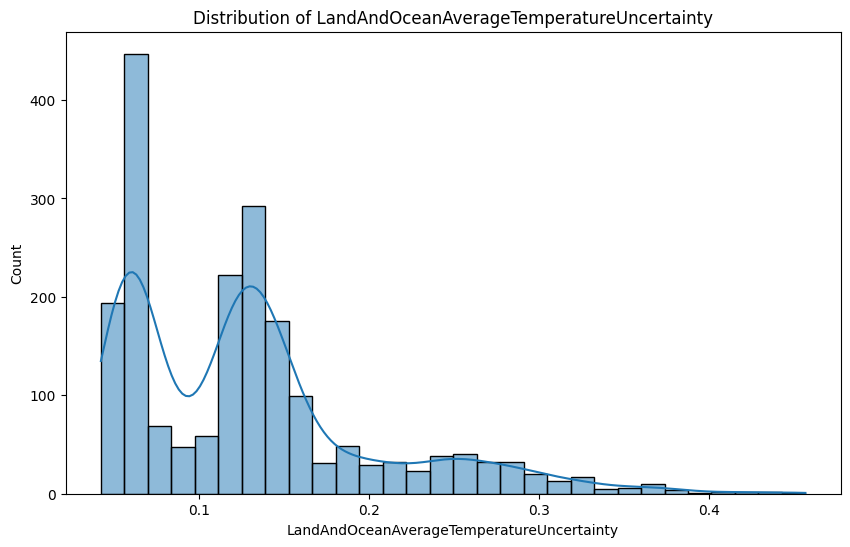

In [26]:
numeric_columns = df_removed_na.columns
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_removed_na[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

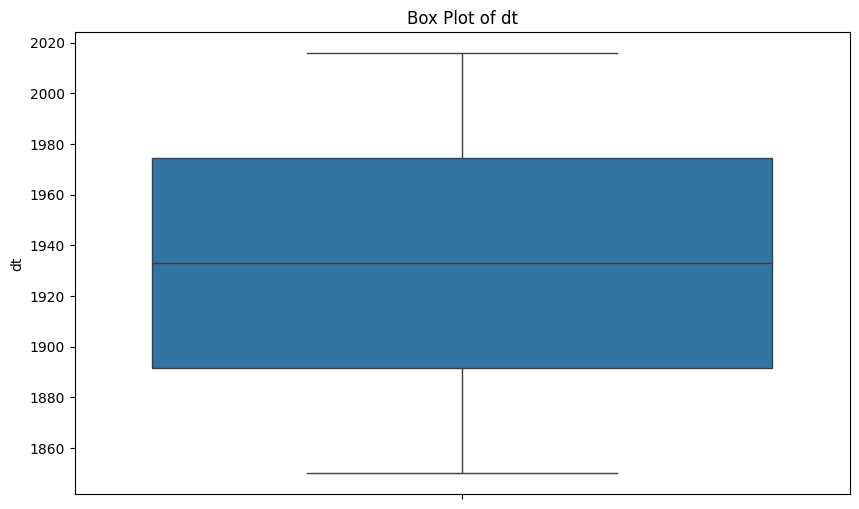

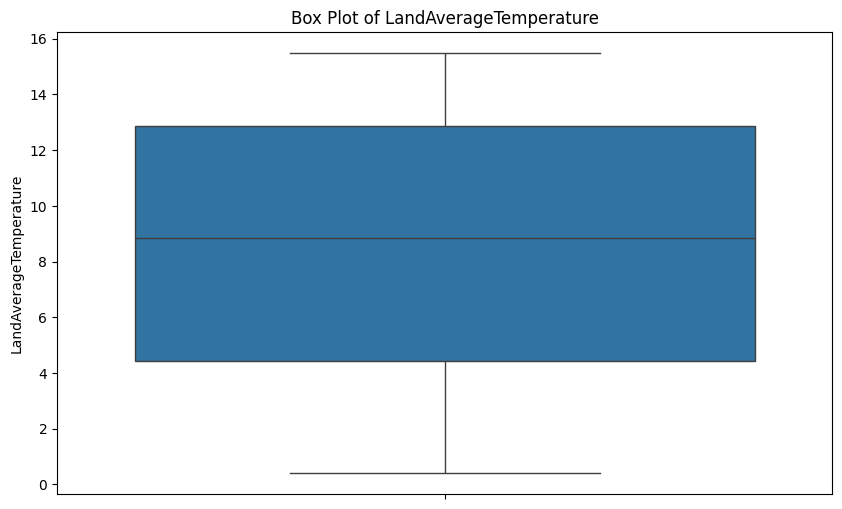

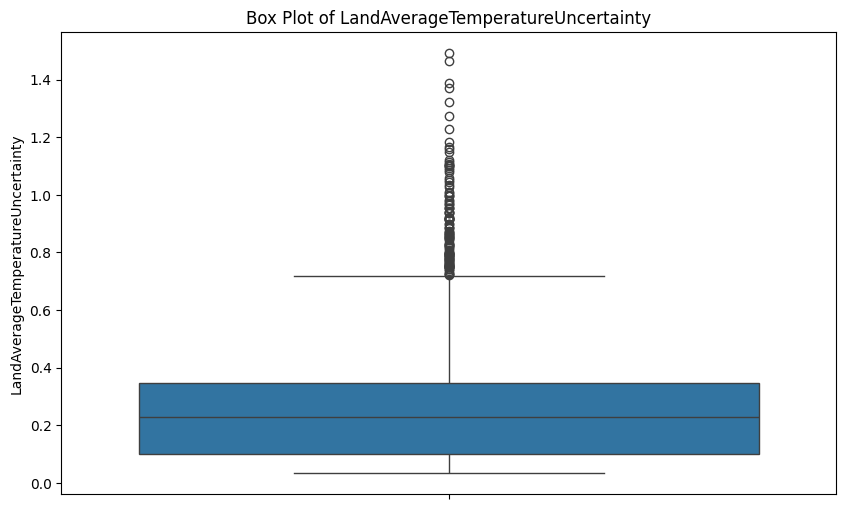

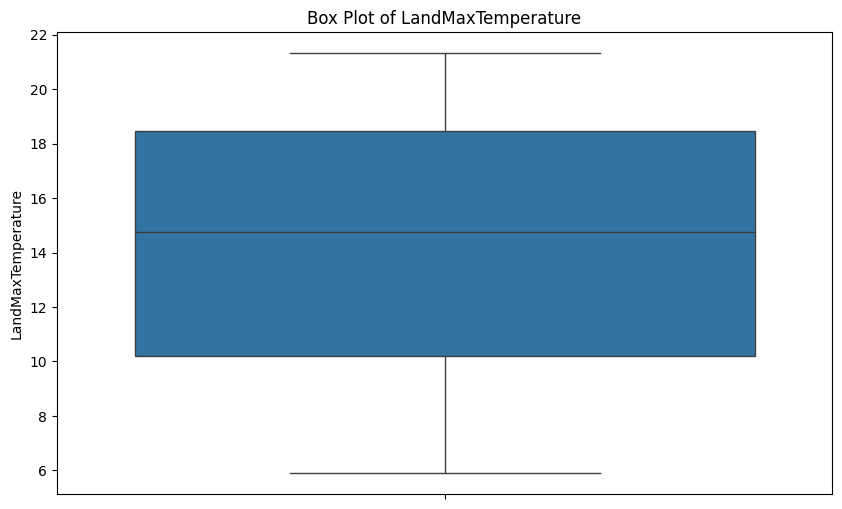

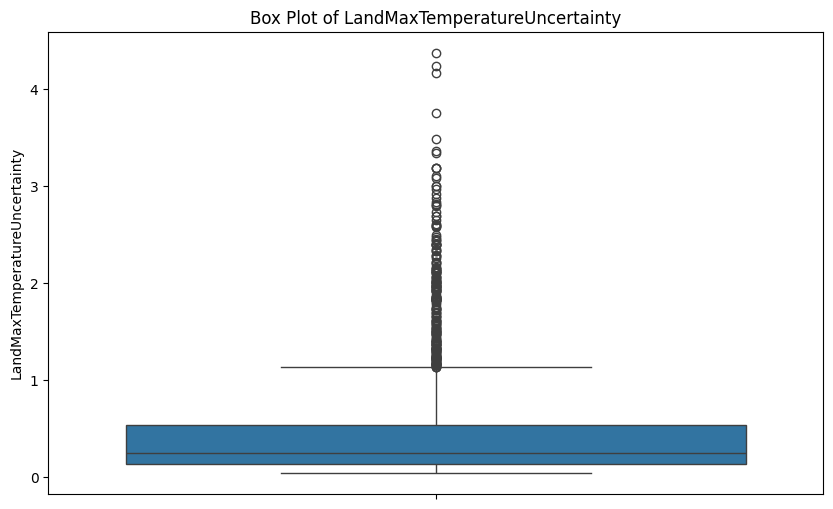

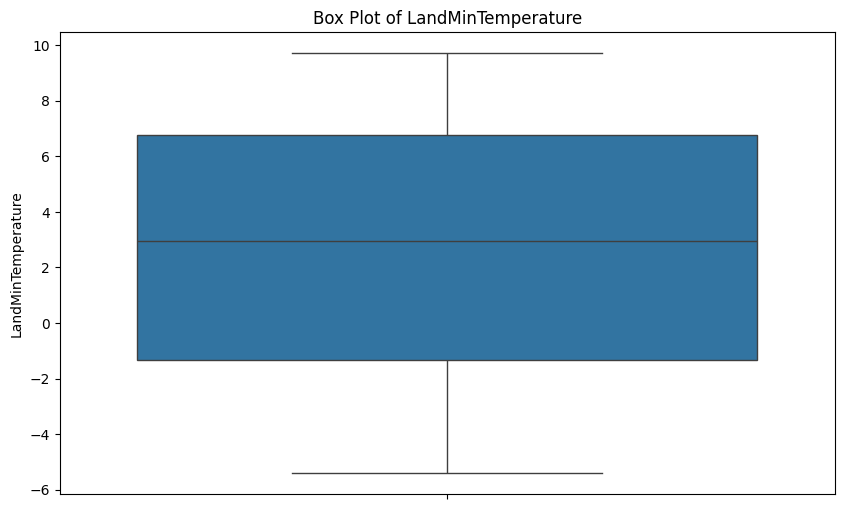

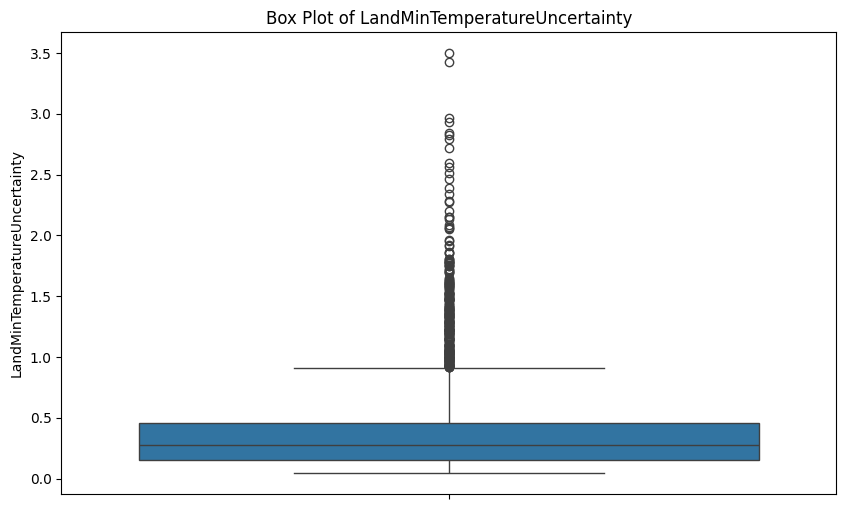

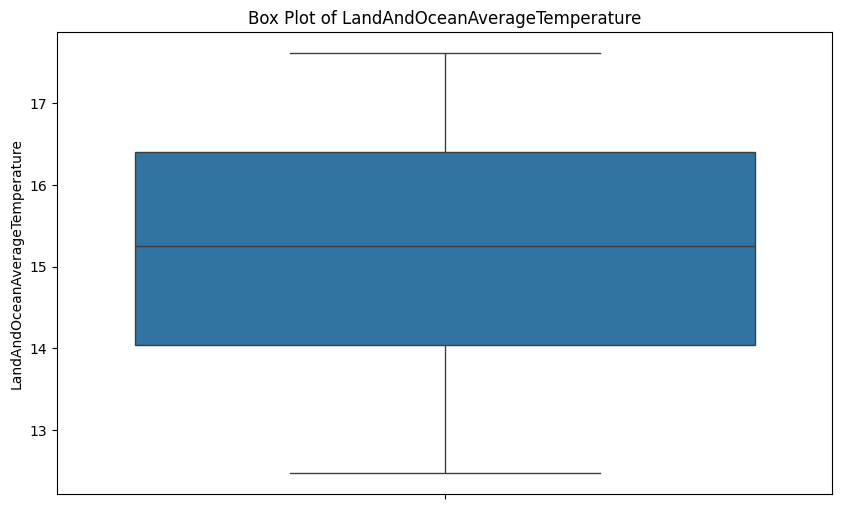

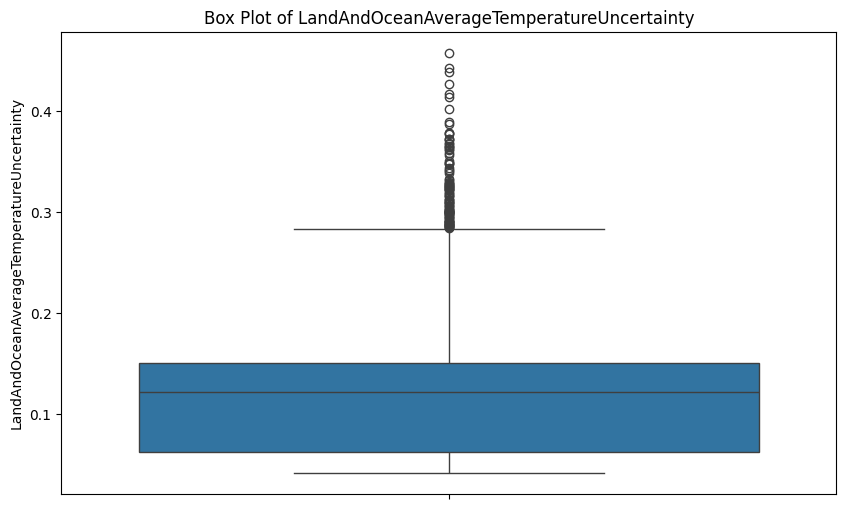

In [27]:
numeric_columns = df_removed_na.columns
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df_removed_na[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

# Analysis of Removed Column Data with Clustering

In [28]:
df_removed_col

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574
1,1750-02-01,3.083,3.702
2,1750-03-01,5.626,3.076
3,1750-04-01,8.490,2.451
4,1750-05-01,11.573,2.072
...,...,...,...
3187,2015-08-01,14.755,0.072
3188,2015-09-01,12.999,0.079
3189,2015-10-01,10.801,0.102
3190,2015-11-01,7.433,0.119


# Regression